**NAIVE Bayes, Decision Tree, KNN**

Implementation of These 3 algorithm for Classification Problem. ( 3 Different )

## Naïve Bayes Algorithm
---
Naïve Bayes is a probabilistic machine learning algorithm based on Bayes’ Theorem. It is called “Naïve” because it assumes that all features are independent of each other given the class label (which is rarely true in real-world data, but still works surprisingly well).

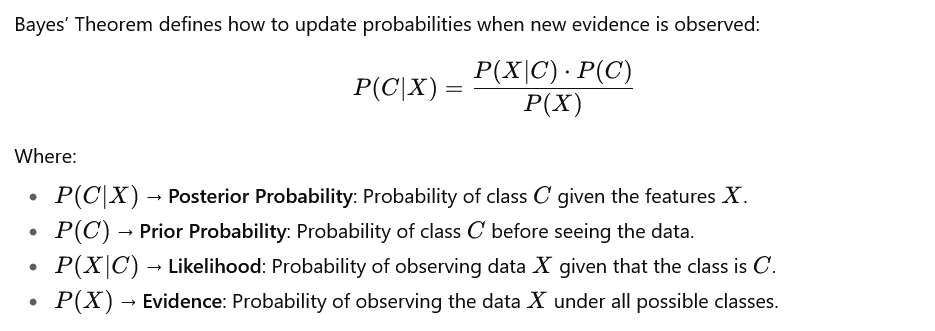





Types of Naïve Bayes  

- Multinomial Naïve Bayes → Used for text classification (e.g., spam filtering, sentiment analysis).

- Bernoulli Naïve Bayes → Works with binary features (e.g., word present/absent in email).

- Gaussian Naïve Bayes → Used when features are continuous and follow a normal distribution.

### Naive Bayes 

In [1]:
import pandas as pd

# Create academic performance dataset
data = pd.DataFrame({
    "Attendance": ["High", "Low", "Medium", "High", "Low", "Medium", "High", "Low", "Medium", "High"],
    "Previous_Grade": ["A", "C", "B", "A", "D", "B", "A", "C", "B", "A"],
    "Study_Hours": ["High", "Low", "Medium", "High", "Low", "Medium", "High", "Low", "Medium", "High"],
    "Final_Result": ["Pass", "Fail", "Pass", "Pass", "Fail", "Pass", "Pass", "Fail", "Pass", "Pass"]
})
print("Academic Performance Dataset:")
data

Academic Performance Dataset:


,Attendance,Previous_Grade,Study_Hours,Final_Result
0,High,A,High,Pass
1,Low,C,Low,Fail
2,Medium,B,Medium,Pass
3,High,A,High,Pass
4,Low,D,Low,Fail
5,Medium,B,Medium,Pass
6,High,A,High,Pass
7,Low,C,Low,Fail
8,Medium,B,Medium,Pass
9,High,A,High,Pass


In [2]:
import numpy as np

# Step 1: Calculate Prior Probabilities
def prior_prob(data, target_col):
    classes = data[target_col].unique()
    priors = {}
    total = len(data)
    for c in classes:
        priors[c] = len(data[data[target_col] == c]) / total
    return priors

# Step 2: Likelihood (P(feature | class))
def likelihood(data, feature_col, feature_val, target_col, target_val):
    subset = data[data[target_col] == target_val]
    return len(subset[subset[feature_col] == feature_val]) / len(subset)

# Step 3: Naive Bayes Prediction
def predict(data, X, target_col="Final_Result"):
    priors = prior_prob(data, target_col)
    posteriors = {}

    for c in priors:
        prob = priors[c]
        for feature in X:
            prob *= likelihood(data, feature, X[feature], target_col, c)
        posteriors[c] = prob

    return max(posteriors, key=posteriors.get), posteriors

# Example predictions
print("=== Naive Bayes Predictions ===")

# Test Case 1: Good student profile
X_test1 = {"Attendance": "High", "Previous_Grade": "A", "Study_Hours": "High"}
label1, probs1 = predict(data, X_test1)
print(f"\nTest Case 1 - {X_test1}")
print(f"Prediction: {label1}")
print(f"Probabilities: {probs1}")

# Test Case 2: Average student profile
X_test2 = {"Attendance": "Medium", "Previous_Grade": "B", "Study_Hours": "Medium"}
label2, probs2 = predict(data, X_test2)
print(f"\nTest Case 2 - {X_test2}")
print(f"Prediction: {label2}")
print(f"Probabilities: {probs2}")

# Test Case 3: At-risk student profile
X_test3 = {"Attendance": "Low", "Previous_Grade": "D", "Study_Hours": "Low"}
label3, probs3 = predict(data, X_test3)
print(f"\nTest Case 3 - {X_test3}")
print(f"Prediction: {label3}")
print(f"Probabilities: {probs3}")

=== Naive Bayes Predictions ===

Test Case 1 - {'Attendance': 'High', 'Previous_Grade': 'A', 'Study_Hours': 'High'}
Prediction: Pass
Probabilities: {'Pass': 0.13061224489795917, 'Fail': 0.0}

Test Case 2 - {'Attendance': 'Medium', 'Previous_Grade': 'B', 'Study_Hours': 'Medium'}
Prediction: Pass
Probabilities: {'Pass': 0.055102040816326525, 'Fail': 0.0}

Test Case 3 - {'Attendance': 'Low', 'Previous_Grade': 'D', 'Study_Hours': 'Low'}
Prediction: Fail
Probabilities: {'Pass': 0.0, 'Fail': 0.09999999999999999}


## Decision Tree Algorithm  


In [3]:
import pandas as pd

# Customer Purchase Behavior Dataset
data = {
    'Age': [22, 35, 45, 28, 33, 29, 41, 25, 38, 31, 27, 39, 24, 42, 30, 26, 36, 23, 40, 32],
    'Income': [25000, 65000, 85000, 45000, 55000, 40000, 75000, 35000, 70000, 50000,
               42000, 68000, 38000, 80000, 52000, 39000, 62000, 36000, 78000, 56000],
    'Education': ['High School', 'Bachelor', 'Master', 'Bachelor', 'Bachelor', 'High School', 
                  'Master', 'High School', 'Master', 'Bachelor', 'Bachelor', 'Master',
                  'High School', 'Master', 'Bachelor', 'High School', 'Bachelor', 'High School', 
                  'Master', 'Bachelor'],
    'Purchase': ['No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
                 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes']
}

df = pd.DataFrame(data)

# Encode categorical columns
df['Education_Encoded'] = df['Education'].map({'High School': 0, 'Bachelor': 1, 'Master': 2})
df['Purchase_Encoded'] = df['Purchase'].map({'No': 0, 'Yes': 1})

print("Customer Purchase Behavior Dataset:")
print(df[['Age', 'Income', 'Education', 'Purchase']].head(8))

print("\nDataFrame after encoding:")
print(df[['Age', 'Income', 'Education_Encoded', 'Purchase_Encoded']].head(8))

Customer Purchase Behavior Dataset:
   Age  Income    Education Purchase
0   22   25000  High School       No
1   35   65000     Bachelor      Yes
2   45   85000       Master      Yes
3   28   45000     Bachelor      Yes
4   33   55000     Bachelor      Yes
5   29   40000  High School       No
6   41   75000       Master      Yes
7   25   35000  High School       No

DataFrame after encoding:
   Age  Income  Education_Encoded  Purchase_Encoded
0   22   25000                  0                 0
1   35   65000                  1                 1
2   45   85000                  2                 1
3   28   45000                  1                 1
4   33   55000                  1                 1
5   29   40000                  0                 0
6   41   75000                  2                 1
7   25   35000                  0                 0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Prepare features and target
X = df[['Age', 'Income', 'Education_Encoded']]
y = df['Purchase_Encoded']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Initialize and train the Decision Tree classifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42)  # Added max_depth to prevent overfitting
clf.fit(X_train, y_train)

print("Decision Tree Model Trained Successfully!")
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"Feature columns: {list(X.columns)}")

Decision Tree Model Trained Successfully!
Training set size: 14
Test set size: 6
Feature columns: ['Age', 'Income', 'Education_Encoded']


In [5]:
# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test data: {accuracy:.2f}")

# Detailed classification report
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=['No Purchase', 'Purchase']))

# Example predictions with different customer profiles
print("\n=== Example Predictions ===")

# Young professional with Bachelor's degree
example1 = [[28, 45000, 1]]  # Age: 28, Income: 45000, Education: Bachelor (1)
pred1 = clf.predict(example1)
print(f"Customer 1 {example1[0]}: {'Will Purchase' if pred1[0] == 1 else 'Will Not Purchase'}")

# Older customer with Master's degree and high income
example2 = [[45, 85000, 2]]  # Age: 45, Income: 85000, Education: Master (2)
pred2 = clf.predict(example2)
print(f"Customer 2 {example2[0]}: {'Will Purchase' if pred2[0] == 1 else 'Will Not Purchase'}")

# Young customer with low income and high school education
example3 = [[22, 30000, 0]]  # Age: 22, Income: 30000, Education: High School (0)
pred3 = clf.predict(example3)
print(f"Customer 3 {example3[0]}: {'Will Purchase' if pred3[0] == 1 else 'Will Not Purchase'}")


Accuracy on test data: 1.00

=== Classification Report ===
              precision    recall  f1-score   support

 No Purchase       1.00      1.00      1.00         2
    Purchase       1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6


=== Example Predictions ===
Customer 1 [28, 45000, 1]: Will Purchase
Customer 2 [45, 85000, 2]: Will Purchase
Customer 3 [22, 30000, 0]: Will Not Purchase

=== Feature Importance ===
Age: 0.000
Income: 1.000
Education_Encoded: 0.000


C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## K-Nearest Neighbours Algorithm

In [6]:
# Smartphone Specifications Dataset
data = [
    {"RAM_GB": 4, "Storage_GB": 64, "Camera_MP": 12, "Price_Category": "Budget"},
    {"RAM_GB": 8, "Storage_GB": 128, "Camera_MP": 48, "Price_Category": "Premium"},
    {"RAM_GB": 6, "Storage_GB": 128, "Camera_MP": 24, "Price_Category": "Mid-range"},
    {"RAM_GB": 4, "Storage_GB": 32, "Camera_MP": 8, "Price_Category": "Budget"},
    {"RAM_GB": 12, "Storage_GB": 256, "Camera_MP": 64, "Price_Category": "Premium"},
    {"RAM_GB": 6, "Storage_GB": 64, "Camera_MP": 20, "Price_Category": "Mid-range"},
    {"RAM_GB": 3, "Storage_GB": 32, "Camera_MP": 5, "Price_Category": "Budget"},
    {"RAM_GB": 8, "Storage_GB": 256, "Camera_MP": 50, "Price_Category": "Premium"},
    {"RAM_GB": 4, "Storage_GB": 64, "Camera_MP": 16, "Price_Category": "Budget"},
    {"RAM_GB": 16, "Storage_GB": 512, "Camera_MP": 108, "Price_Category": "Premium"},
    {"RAM_GB": 6, "Storage_GB": 128, "Camera_MP": 32, "Price_Category": "Mid-range"},
    {"RAM_GB": 8, "Storage_GB": 128, "Camera_MP": 40, "Price_Category": "Premium"},
    {"RAM_GB": 4, "Storage_GB": 64, "Camera_MP": 13, "Price_Category": "Budget"},
    {"RAM_GB": 12, "Storage_GB": 256, "Camera_MP": 50, "Price_Category": "Premium"},
    {"RAM_GB": 6, "Storage_GB": 64, "Camera_MP": 25, "Price_Category": "Mid-range"},
    {"RAM_GB": 8, "Storage_GB": 256, "Camera_MP": 48, "Price_Category": "Premium"},
    {"RAM_GB": 3, "Storage_GB": 32, "Camera_MP": 8, "Price_Category": "Budget"},
    {"RAM_GB": 6, "Storage_GB": 128, "Camera_MP": 28, "Price_Category": "Mid-range"},
    {"RAM_GB": 4, "Storage_GB": 32, "Camera_MP": 12, "Price_Category": "Budget"},
    {"RAM_GB": 8, "Storage_GB": 128, "Camera_MP": 45, "Price_Category": "Premium"}
]

print("Smartphone Specifications Dataset:")
print("Sample entries:")
for i, phone in enumerate(data[:5]):
    print(f"Phone {i+1}: {phone}")
print(f"... and {len(data)-5} more entries")

Smartphone Specifications Dataset:
Sample entries:
Phone 1: {'RAM_GB': 4, 'Storage_GB': 64, 'Camera_MP': 12, 'Price_Category': 'Budget'}
Phone 2: {'RAM_GB': 8, 'Storage_GB': 128, 'Camera_MP': 48, 'Price_Category': 'Premium'}
Phone 3: {'RAM_GB': 6, 'Storage_GB': 128, 'Camera_MP': 24, 'Price_Category': 'Mid-range'}
Phone 4: {'RAM_GB': 4, 'Storage_GB': 32, 'Camera_MP': 8, 'Price_Category': 'Budget'}
Phone 5: {'RAM_GB': 12, 'Storage_GB': 256, 'Camera_MP': 64, 'Price_Category': 'Premium'}
... and 15 more entries


In [7]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Convert to DataFrame
df = pd.DataFrame(data)

# Encode labels: Budget = 0, Mid-range = 1, Premium = 2
label_mapping = {'Budget': 0, 'Mid-range': 1, 'Premium': 2}
df['Label'] = df['Price_Category'].map(label_mapping)

print("Dataset after encoding:")
print(df.head())

# Features and labels
X = df[['RAM_GB', 'Storage_GB', 'Camera_MP']].values
y = df['Label'].values

# Standardize features for better KNN performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\nDataset shape: {X.shape}")
print(f"Classes: {list(label_mapping.keys())}")
print(f"Class distribution: {dict(zip(*np.unique(y, return_counts=True)))}")

Dataset after encoding:
   RAM_GB  Storage_GB  Camera_MP Price_Category  Label
0       4          64         12         Budget      0
1       8         128         48        Premium      2
2       6         128         24      Mid-range      1
3       4          32          8         Budget      0
4      12         256         64        Premium      2

Dataset shape: (20, 3)
Classes: ['Budget', 'Mid-range', 'Premium']
Class distribution: {0: 7, 1: 5, 2: 8}


In [8]:
class KNNFromScratch:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        preds = []
        for x in X_test:
            # Compute Euclidean distances to all training points
            distances = np.linalg.norm(self.X_train - x, axis=1)
            # Find indices of k nearest neighbors
            k_indices = distances.argsort()[:self.k]
            # Get the labels of these neighbors
            k_labels = self.y_train[k_indices]
            # Majority vote
            most_common = Counter(k_labels).most_common(1)[0][0]
            preds.append(most_common)
        return np.array(preds)

    def predict_with_distances(self, X_test):
        """Enhanced prediction method that also returns neighbor information"""
        preds = []
        neighbor_info = []
        
        for x in X_test:
            # Compute distances
            distances = np.linalg.norm(self.X_train - x, axis=1)
            # Find k nearest neighbors
            k_indices = distances.argsort()[:self.k]
            k_labels = self.y_train[k_indices]
            k_distances = distances[k_indices]
            
            # Store neighbor information
            neighbors = []
            for i, (idx, dist) in enumerate(zip(k_indices, k_distances)):
                neighbors.append({
                    'index': idx,
                    'distance': dist,
                    'label': self.y_train[idx]
                })
            
            neighbor_info.append(neighbors)
            
            # Majority vote
            most_common = Counter(k_labels).most_common(1)[0][0]
            preds.append(most_common)
            
        return np.array(preds), neighbor_info

In [9]:
# Train both implementations
knn_scratch = KNNFromScratch(k=3)
knn_scratch.fit(X_scaled, y)

knn_sklearn = KNeighborsClassifier(n_neighbors=3)
knn_sklearn.fit(X_scaled, y)

print("KNN models trained successfully!")
print(f"Using k = 3 neighbors")
print(f"Features used: RAM (GB), Storage (GB), Camera (MP)")

KNN models trained successfully!
Using k = 3 neighbors
Features used: RAM (GB), Storage (GB), Camera (MP)


In [10]:
# Test examples with different smartphone specifications
test_phones = np.array([
    [4, 64, 12],    # Budget phone specs
    [8, 256, 48],   # Premium phone specs  
    [6, 128, 24],   # Mid-range phone specs
    [12, 512, 64]   # High-end premium specs
])

# Scale the test data using the same scaler
test_phones_scaled = scaler.transform(test_phones)

# Predictions using sklearn
preds_sklearn = knn_sklearn.predict(test_phones_scaled)

# Predictions using our implementation
preds_scratch = knn_scratch.predict(test_phones_scaled)

# Enhanced predictions with neighbor details
preds_detailed, neighbor_info = knn_scratch.predict_with_distances(test_phones_scaled)

# Map labels back to categories
category_names = {0: 'Budget', 1: 'Mid-range', 2: 'Premium'}

print("=== KNN Predictions Comparison ===")
print("\nScikit-learn KNN Results:")
for i, (phone, pred) in enumerate(zip(test_phones, preds_sklearn)):
    print(f"Phone {i+1} [RAM: {phone[0]}GB, Storage: {phone[1]}GB, Camera: {phone[2]}MP] -> {category_names[pred]}")

print("\nCustom KNN Results:")
for i, (phone, pred) in enumerate(zip(test_phones, preds_scratch)):
    print(f"Phone {i+1} [RAM: {phone[0]}GB, Storage: {phone[1]}GB, Camera: {phone[2]}MP] -> {category_names[pred]}")

print("\n=== Detailed Analysis (Custom KNN) ===")
for i, (phone, pred, neighbors) in enumerate(zip(test_phones, preds_detailed, neighbor_info)):
    print(f"\nPhone {i+1} [RAM: {phone[0]}GB, Storage: {phone[1]}GB, Camera: {phone[2]}MP]")
    print(f"Prediction: {category_names[pred]}")
    print("Nearest neighbors:")
    for j, neighbor in enumerate(neighbors):
        neighbor_phone = X[neighbor['index']]
        print(f"  {j+1}. Distance: {neighbor['distance']:.3f}, Category: {category_names[neighbor['label']]}, "
              f"Specs: [RAM: {neighbor_phone[0]}GB, Storage: {neighbor_phone[1]}GB, Camera: {neighbor_phone[2]}MP]")

=== KNN Predictions Comparison ===

Scikit-learn KNN Results:
Phone 1 [RAM: 4GB, Storage: 64GB, Camera: 12MP] -> Budget
Phone 2 [RAM: 8GB, Storage: 256GB, Camera: 48MP] -> Premium
Phone 3 [RAM: 6GB, Storage: 128GB, Camera: 24MP] -> Mid-range
Phone 4 [RAM: 12GB, Storage: 512GB, Camera: 64MP] -> Premium

Custom KNN Results:
Phone 1 [RAM: 4GB, Storage: 64GB, Camera: 12MP] -> Budget
Phone 2 [RAM: 8GB, Storage: 256GB, Camera: 48MP] -> Premium
Phone 3 [RAM: 6GB, Storage: 128GB, Camera: 24MP] -> Mid-range
Phone 4 [RAM: 12GB, Storage: 512GB, Camera: 64MP] -> Premium

=== Detailed Analysis (Custom KNN) ===

Phone 1 [RAM: 4GB, Storage: 64GB, Camera: 12MP]
Prediction: Budget
Nearest neighbors:
  1. Distance: 0.000, Category: Budget, Specs: [RAM: 4GB, Storage: 64GB, Camera: 12MP]
  2. Distance: 0.041, Category: Budget, Specs: [RAM: 4GB, Storage: 64GB, Camera: 13MP]
  3. Distance: 0.165, Category: Budget, Specs: [RAM: 4GB, Storage: 64GB, Camera: 16MP]

Phone 2 [RAM: 8GB, Storage: 256GB, Camera: 48M

# **Rocchio algorithm**  

In [11]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def rocchio_similarity_comparison(query, docs, relevant_idxs, irrelevant_idxs, alpha=1, beta=0.75, gamma=0.15):
    """
    Rocchio Algorithm for Query Refinement
    
    Parameters:
    - alpha: weight for original query
    - beta: weight for relevant documents  
    - gamma: weight for irrelevant documents (subtracted)
    """
    
    # Create TF-IDF vectors
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf = vectorizer.fit_transform([query] + docs).toarray()

    q_vec = tfidf[0]  # Original query vector
    doc_vecs = tfidf[1:]  # Document vectors

    # Calculate centroids
    rel_vecs = np.array([doc_vecs[i] for i in relevant_idxs])
    irrel_vecs = np.array([doc_vecs[i] for i in irrelevant_idxs])

    rel_centroid = np.mean(rel_vecs, axis=0) if len(rel_vecs) > 0 else np.zeros_like(q_vec)
    irrel_centroid = np.mean(irrel_vecs, axis=0) if len(irrel_vecs) > 0 else np.zeros_like(q_vec)

    # Apply Rocchio formula
    modified_query = alpha * q_vec + beta * rel_centroid - gamma * irrel_centroid

    # Calculate similarities
    initial_sims = cosine_similarity([q_vec], doc_vecs)[0]
    updated_sims = cosine_similarity([modified_query], doc_vecs)[0]

    print(f"Original Query: '{query}'")
    print(f"Rocchio Parameters: α={alpha}, β={beta}, γ={gamma}")
    print(f"Relevant docs: {relevant_idxs}, Irrelevant docs: {irrelevant_idxs}")
    print("\n" + "="*80)
    
    for i, doc in enumerate(docs):
        relevance = "RELEVANT" if i in relevant_idxs else "IRRELEVANT" if i in irrelevant_idxs else "UNKNOWN"
        improvement = updated_sims[i] - initial_sims[i]
        trend = "↑" if improvement > 0.01 else "↓" if improvement < -0.01 else "→"
        
        print(f"Doc {i}: {doc[:60]}...")
        print(f"  Status: {relevance}")
        print(f"  Initial Similarity: {initial_sims[i]:.4f}")
        print(f"  Updated Similarity: {updated_sims[i]:.4f} {trend}")
        print(f"  Change: {improvement:+.4f}")
        print()

    return initial_sims, updated_sims

# Research Paper Dataset Example
docs = [
    "Deep learning neural networks for image recognition and computer vision applications with convolutional architectures",
    "Traditional cooking recipes from Mediterranean cuisine including pasta and olive oil preparations",
    "Machine learning algorithms for natural language processing and text classification using transformers",
    "Travel guide for European destinations including historical monuments and cultural attractions",
    "Artificial intelligence applications in healthcare diagnostics and medical image analysis systems",
    "Financial market analysis using quantitative methods and statistical modeling techniques",
    "Supervised learning methods for predictive analytics and data mining in business intelligence"
]

query = "machine learning artificial intelligence"
relevant = [0, 2, 4, 6]     # AI/ML related papers
irrelevant = [1, 3]         # Non-technical papers

print("=== ROCCHIO ALGORITHM DEMONSTRATION ===")
print("Domain: Research Paper Recommendation System")
print()

initial_sims, updated_sims = rocchio_similarity_comparison(query, docs, relevant, irrelevant)

# Show ranking changes
print("="*80)
print("RANKING COMPARISON:")
print("="*80)

initial_ranking = sorted(enumerate(initial_sims), key=lambda x: x[1], reverse=True)
updated_ranking = sorted(enumerate(updated_sims), key=lambda x: x[1], reverse=True)

print("BEFORE Rocchio (Initial Query):")
for rank, (doc_idx, sim) in enumerate(initial_ranking, 1):
    status = "✓ REL" if doc_idx in relevant else "✗ IRR" if doc_idx in irrelevant else "? UNK"
    print(f"{rank}. Doc {doc_idx} ({status}): {sim:.4f}")

print("\nAFTER Rocchio (Refined Query):")
for rank, (doc_idx, sim) in enumerate(updated_ranking, 1):
    status = "✓ REL" if doc_idx in relevant else "✗ IRR" if doc_idx in irrelevant else "? UNK"
    print(f"{rank}. Doc {doc_idx} ({status}): {sim:.4f}")


=== ROCCHIO ALGORITHM DEMONSTRATION ===
Domain: Research Paper Recommendation System

Original Query: 'machine learning artificial intelligence'
Rocchio Parameters: α=1, β=0.75, γ=0.15
Relevant docs: [0, 2, 4, 6], Irrelevant docs: [1, 3]

Doc 0: Deep learning neural networks for image recognition and comp...
  Status: RELEVANT
  Initial Similarity: 0.0841
  Updated Similarity: 0.2613 ↑
  Change: +0.1772

Doc 1: Traditional cooking recipes from Mediterranean cuisine inclu...
  Status: IRRELEVANT
  Initial Similarity: 0.0000
  Updated Similarity: -0.0660 ↓
  Change: -0.0660

Doc 2: Machine learning algorithms for natural language processing ...
  Status: RELEVANT
  Initial Similarity: 0.2438
  Updated Similarity: 0.3669 ↑
  Change: +0.1230

Doc 3: Travel guide for European destinations including historical ...
  Status: IRRELEVANT
  Initial Similarity: 0.0000
  Updated Similarity: -0.0660 ↓
  Change: -0.0660

Doc 4: Artificial intelligence applications in healthcare diagnosti...
  Status

In [12]:
# Summary comparison of all three algorithms
print("="*80)
print("                    ALGORITHM COMPARISON SUMMARY")
print("="*80)

comparison_data = {
    'Algorithm': ['Naive Bayes', 'Decision Tree', 'K-Nearest Neighbors'],
    'Type': ['Probabilistic', 'Tree-based', 'Instance-based'],
    'Assumption': ['Feature Independence', 'Hierarchical Splits', 'Local Similarity'],
    'Training Speed': ['Fast', 'Medium', 'Instant (Lazy)'],
    'Prediction Speed': ['Fast', 'Fast', 'Slow'],
    'Interpretability': ['Medium', 'High', 'Low'],
    'Overfitting Risk': ['Low', 'High', 'Medium'],
    'Best For': ['Text Classification', 'Rule Extraction', 'Recommendation Systems']
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

print("\n" + "="*80)
print("                          DATASET APPLICATIONS")
print("="*80)
print("✓ Naive Bayes: Academic Performance Prediction")
print("  - Features: Attendance, Previous Grades, Study Hours")
print("  - Output: Pass/Fail prediction")
print("  - Strength: Handles categorical features well")

print("\n✓ Decision Tree: Customer Purchase Behavior")
print("  - Features: Age, Income, Education Level")  
print("  - Output: Purchase/No Purchase")
print("  - Strength: Easy to interpret business rules")

print("\n✓ K-Nearest Neighbors: Smartphone Price Categorization")
print("  - Features: RAM, Storage, Camera Quality")
print("  - Output: Budget/Mid-range/Premium")
print("  - Strength: No assumptions about data distribution")

print("\n✓ Rocchio Algorithm: Research Paper Recommendation")
print("  - Input: Query terms and relevance feedback")
print("  - Output: Improved document ranking")
print("  - Strength: Learns from user feedback")

                    ALGORITHM COMPARISON SUMMARY
          Algorithm           Type           Assumption Training Speed Prediction Speed Interpretability Overfitting Risk               Best For
        Naive Bayes  Probabilistic Feature Independence           Fast             Fast           Medium              Low    Text Classification
      Decision Tree     Tree-based  Hierarchical Splits         Medium             Fast             High             High        Rule Extraction
K-Nearest Neighbors Instance-based     Local Similarity Instant (Lazy)             Slow              Low           Medium Recommendation Systems

                          DATASET APPLICATIONS
✓ Naive Bayes: Academic Performance Prediction
  - Features: Attendance, Previous Grades, Study Hours
  - Output: Pass/Fail prediction
  - Strength: Handles categorical features well

✓ Decision Tree: Customer Purchase Behavior
  - Features: Age, Income, Education Level
  - Output: Purchase/No Purchase
  - Strength: Easy 

## Naive Bayes Algorithm

Naive Bayes is a simple yet powerful probabilistic classification algorithm based on Bayes' theorem. It's called "naive" because it assumes that all features are independent of each other, which is rarely true in real-world data. However, despite this simplifying assumption, Naive Bayes often performs surprisingly well and is particularly effective for text classification and other tasks with high-dimensional data.

### Key Concepts

**Bayes' Theorem:**
The foundation of Naive Bayes is Bayes' theorem, which describes the probability of an event, based on prior knowledge of conditions that might be related to the event. It is expressed as:

$P(A|B) = \frac{P(B|A) * P(A)}{P(B)}$

Where:
*   $P(A|B)$: **Posterior Probability** - The probability of event A happening given that event B has occurred. This is what we want to predict in classification (e.g., the probability of a document belonging to a class given its words).
*   $P(B|A)$: **Likelihood** - The probability of event B happening given that event A has occurred (e.g., the probability of a word appearing in a document given its class).
*   $P(A)$: **Prior Probability** - The initial probability of event A happening before considering any evidence (e.g., the overall probability of a document belonging to a specific class in the dataset).
*   $P(B)$: **Evidence** - The probability of event B happening (e.g., the overall probability of a word appearing in any document). This acts as a normalizing constant.

### How Naive Bayes Works

In the context of classification, Naive Bayes calculates the probability of a data point belonging to each class, given its features. It selects the class with the highest probability as the prediction.

For a given data point with features $x_1, x_2, ..., x_n$ and a class $C_k$, the algorithm calculates:

$P(C_k | x_1, x_2, ..., x_n) \propto P(C_k) * P(x_1 | C_k) * P(x_2 | C_k) * ... * P(x_n | C_k)$

Due to the naive independence assumption, $P(x_i | C_k, x_1, ..., x_{i-1}, x_{i+1}, ..., x_n) = P(x_i | C_k)$.

### Types of Naive Bayes

There are several variations of Naive Bayes, primarily differing in how they model the distribution of features:

*   **Gaussian Naive Bayes:** Used for continuous features, assuming they follow a Gaussian (normal) distribution.
*   **Multinomial Naive Bayes:** Suitable for discrete features, typically counts, like word counts in text classification.
*   **Bernoulli Naive Bayes:** Designed for binary features (e.g., whether a word is present or absent in a document).

### Applications

Naive Bayes is commonly used for:

*   **Text Classification:** Spam filtering, sentiment analysis, topic categorization.
*   **Medical Diagnosis:** Classifying diseases based on symptoms.
*   **Spam Filtering:** Identifying spam emails.
*   **Recommendation Systems:** Predicting user preferences.
*   **Fraud Detection:** Identifying fraudulent transactions.

Its simplicity, speed, and effectiveness, especially with large datasets and high-dimensional feature spaces, make it a popular choice for various classification problems.